# Project Part 3

## Project Goal and Significance

### Goal

The objective of Part 3 of this project is to **predict** the product rating by leveraging **product features** (e.g., product name, loves count, average rating, etc.). We also plan to analyze which features contribute most to product ratings, providing meaningful insights into customer preferences and product considerations.

### Significance
This project holds value in several key areas:
1. **Improved Customer Satisfaction**: Delivers actionable insights to meet individual preferences more effectively.
2. **Business Insights**: Helps businesses identify features that drive satisfaction, informing product improvements and marketing strategies.
3. **Advancing E-commerce AI**: Demonstrates the power of predictive modeling in improving decision-making.

In summary, this project not only enhances user satisfaction but also deepens our understanding of product feature and performance, bridging the gap between data-driven technology and personalized service.

## Preprocessing Data

In this step, we plan to import and preprocess the data for future usage. This includes handling missing values, extracting relevant features, and merging datasets to create a comprehensive dataframe for analysis. The preprocessing steps ensure that the data is clean and ready for modeling and visualization.

### Data Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import collections

In [2]:
# Import the dataset
product_df = pd.read_csv("Sephora/product_info.csv")
print("product info dataframe shape: ", product_df.shape)
product_df.head()

product info dataframe shape:  (8494, 27)


,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,NaN,NaN,NaN,...,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,85.0,30.0
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.2500,16.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
3,P473660,Kasbah Eau de Parfum,6342,19-69,3018,4.4762,21.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
4,P473658,Purple Haze Eau de Parfum,6342,19-69,2691,3.2308,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0


### Data Cleaning
In this part, we perform data cleaning on extracting numerical values of price and size from corresponding columns, also calculating the price per unit based on the values yielded.

In [3]:
product_df['size_oz'] = product_df['size'].str.extract(r'(\d+\.?\d*)\s*oz', expand=False).astype(float)
print(product_df[['size', 'size_oz']].sample(5))

product_df['size_ml'] = product_df['size'].str.extract(r'(\d+\.?\d*)\s*mL', expand=False)
product_df['size_ml'] = product_df['size_ml'].astype(float)
print(product_df[['size', 'size_ml']].sample(5))

                                    size  size_oz
755   2.2 oz / 65 mL eau de parfum spray     2.20
5052                       4.0 oz/ 120 g     4.00
7065                      3.04 oz/ 90 mL     3.04
7442                       0.16 oz/ 5 mL     0.16
4431                        0.7 oz/ 20 g     0.70
                  size  size_ml
6331    0.08 oz/ 2.4 g      NaN
2837               NaN      NaN
4058    6.8 oz/ 200 mL    200.0
4948               NaN      NaN
730   8.45 oz / 250 mL    250.0


In [4]:
product_df['price_per_oz'] = product_df['price_usd'] / product_df['size_oz']
product_df['price_per_ml'] = product_df['price_usd'] / product_df['size_ml']
product_df[['price_usd', 'size_oz', 'price_per_oz', 'size_ml', 'price_per_ml']].sample(10)

,price_usd,size_oz,price_per_oz,size_ml,price_per_ml
5434,86.0,NaN,NaN,NaN,NaN
6414,30.0,0.14,214.285714,NaN,NaN
5260,30.0,0.50,60.000000,15.0,2.000000
1437,19.5,5.20,3.750000,NaN,NaN
3843,140.0,3.30,42.424242,100.0,1.400000
6378,8.0,0.80,10.000000,NaN,NaN
5051,42.0,1.70,24.705882,NaN,NaN
2022,110.0,1.00,110.000000,30.0,3.666667
4650,16.0,0.10,160.000000,3.0,5.333333
2521,27.0,16.00,1.687500,NaN,NaN


After that, we check out for teh missing values in the dataset and fill up all the NaN values in the dataset according to certain rules. The detailed ways of handling are listed as follows. Also specifically, we drop the rows without `review_rating` information for analysis convenience. As for feature, we drop columns of size information themselves.

In [5]:
# Check for missing values in the dataset

# 2. Handle price-related columns by filling with price_usd
product_df = product_df.assign(
    child_max_price=product_df['child_max_price'].fillna(product_df['price_usd']),
    child_min_price=product_df['child_min_price'].fillna(product_df['price_usd']),
    sale_price_usd=product_df['sale_price_usd'].fillna(product_df['price_usd']),
    value_price_usd=product_df['value_price_usd'].fillna(product_df['price_usd'])
)

# 3. Handle variation-related columns
product_df = product_df.assign(
    variation_desc=product_df['variation_desc'].fillna('No variation'),
    variation_type=product_df['variation_type'].fillna('Unknown'),
    variation_value=product_df['variation_value'].fillna('Unknown')
)

# 4. Handle product and review metadata
product_df = product_df.assign(
    tertiary_category=product_df['tertiary_category'].fillna('Uncategorized'),
    secondary_category=product_df['secondary_category'].fillna('Uncategorized'),
)

# 6. Handle ingredient and highlight columns
product_df = product_df.assign(
    ingredients=product_df['ingredients'].fillna('Ingredients not listed'),
    highlights=product_df['highlights'].fillna('No highlights available')
)

# 7. Handle size-related columns
product_df = product_df.assign(
    size=product_df['size'].fillna('Unknown size'),
    size_ml=product_df['size_ml'].fillna(product_df['size_ml'].median()),
    size_oz=product_df['size_oz'].fillna(product_df['size_oz'].median())
)

# 8. Handle price per unit columns
product_df = product_df.assign(
    price_per_ml=product_df['price_per_ml'].fillna(product_df['price_per_ml'].median()),
    price_per_oz=product_df['price_per_oz'].fillna(product_df['price_per_oz'].median())
)

# 9. Print the result to confirm the missing values have been handled
missing_counts_after = product_df.isna().sum()
print("Missing values after processing:")
print(missing_counts_after[missing_counts_after > 0])

Missing values after processing:
rating     278
reviews    278
dtype: int64


In [6]:
# Drop rows without review_rating information for analysis convenience
product_df = product_df.dropna(subset=['rating'])

# Print the result to confirm the missing values have been handled
missing_counts_after = product_df.isna().sum()
print("Missing values after processing:")
print(missing_counts_after[missing_counts_after > 0])

Missing values after processing:
Series([], dtype: int64)


In [7]:
drop_columns2 = ['size', 'size_ml']
product_df = product_df.drop(columns=drop_columns2)

In [8]:
print("Shape of Sephora: ", product_df.shape)
product_df.head()

Shape of Sephora:  (8216, 29)


,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,variation_type,variation_value,variation_desc,...,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price,size_oz,price_per_oz,price_per_ml
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,Unknown,Unknown,No variation,...,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,35.0,35.0,1.7,32.352941,1.066667
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,Size + Concentration + Formulation,3.4 oz/ 100 mL,No variation,...,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,85.0,30.0,3.4,57.352941,1.950000
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.2500,16.0,Size + Concentration + Formulation,3.4 oz/ 100 mL,No variation,...,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0,3.4,57.352941,1.950000
3,P473660,Kasbah Eau de Parfum,6342,19-69,3018,4.4762,21.0,Size + Concentration + Formulation,3.4 oz/ 100 mL,No variation,...,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0,3.4,57.352941,1.950000
4,P473658,Purple Haze Eau de Parfum,6342,19-69,2691,3.2308,13.0,Size + Concentration + Formulation,3.4 oz/ 100 mL,No variation,...,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0,3.4,57.352941,1.950000


In [9]:
product_df.columns

Index(['product_id', 'product_name', 'brand_id', 'brand_name', 'loves_count',
       'rating', 'reviews', 'variation_type', 'variation_value',
       'variation_desc', 'ingredients', 'price_usd', 'value_price_usd',
       'sale_price_usd', 'limited_edition', 'new', 'online_only',
       'out_of_stock', 'sephora_exclusive', 'highlights', 'primary_category',
       'secondary_category', 'tertiary_category', 'child_count',
       'child_max_price', 'child_min_price', 'size_oz', 'price_per_oz',
       'price_per_ml'],
      dtype='object')

### Target Category Selection
In this step, we set the target category we aim to predict as the `rating_category` column. This column represents the product ratings given by customers and will be used to understand and predict customer preferences and product performance. Specifically, we take value `4.0` as the boundary point to split rating into 2 categories. By labeling `True` and `False` for the two categories, our future work for binary classification can become more convenient.

In [10]:
product_df['rating_category'] = product_df['rating'].astype(float) > 4.0
product_df.drop(columns=['rating'], inplace=True)

In [11]:
product_df['rating_category'].value_counts()

rating_category
True     5929
False    2287
Name: count, dtype: int64

### Data Visualization

To further have an idea of the features we should include for training input, we carried out several visualization shown as follows. For each numerical and categorical data, we plot and observed the different distribution patterns of each rating category. At the same time, heatmap is plotted to have an idea of the correlation between varaibles.

In [12]:
target_cols = ['rating']
id_cols = ['product_id', 'brand_id']
numerical_features = ['price_usd', 'child_count', 'child_max_price', 'child_min_price', 
                    'loves_count','price_per_ml', 'price_per_oz', 
                    'reviews', 'sale_price_usd', 'size_oz', 'value_price_usd']
categorical_features = ['new', 'online_only', 'out_of_stock', 'sephora_exclusive',
                        'limited_edition']
text_cols = ['product_name', 'variation_desc', 'variation_type', 'variation_value',
             'highlights', 'secondary_category', 'tertiary_category', 'ingredients',
             'brand_name']

In [13]:
# Code generation by ChatGPT

# Update matplotlib parameters for tighter layouts
plt.rcParams.update({
    'figure.autolayout': True,
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'figure.constrained_layout.use': True
})


def plot_categorical_distribution_by_target(df, column, target="Transported", palette="Set2"):
    """
    Plot the distribution of a categorical variable, grouped by the target variable in a 1-row, 2-column layout.
    
    Parameters:
    df (pd.DataFrame): The dataset.
    column (str): The categorical column to visualize.
    target (str): The target variable to group by.
    palette (str): The color palette to use.
    
    Returns:
    None
    """
    # Extract unique categories and sort them by their first letter
    categories = df[column].dropna().unique()
    n = len(categories)
    sorted_categories = sorted(categories, key=lambda x: str(x)[0])
    
    target_values = df[target].unique()
    if isinstance(target_values[0], np.float64):
        target_values = sorted(target_values)
    colors = sns.color_palette(palette, n_colors=len(target_values))
    fig, axes = plt.subplots(1, n, figsize=(3 * n + 2, 4), sharey=False)  # n columns per row
    
    for i, value in enumerate(target_values):
        sns.countplot(
            data=df[df[target] == value],
            x=column,
            order=sorted_categories,  # Pass the sorted order here
            hue=None,
            color=colors[i],
            ax=axes[i]
        )
        axes[i].set_title(f"{target} = {value}")
        axes[i].set_xlabel(column)
        axes[i].set_ylabel("Count" if i == 0 else "")
        axes[i].tick_params(axis='x', rotation=45)
    
    plt.suptitle(f"Distribution of {column} by {target}")
    plt.tight_layout()
    plt.show()


def plot_numeric_distribution_by_target(df, column, target="Transported", bins=20, kde=True, palette="Set2"):
    """
    Plot the distribution of a numeric variable, grouped by the target variable in a 1-row, 2-column layout.
    
    Parameters:
    df (pd.DataFrame): The dataset.
    column (str): The numeric column to visualize.
    target (str): The target variable to group by.
    bins (int): Number of bins for the histogram.
    kde (bool): Whether to show a KDE plot.
    palette (str): The color palette for different target values.
    
    Returns:
    None
    """
    target_values = df[target].unique()
    n = len(target_values)
    if isinstance(target_values[0], np.float64):
        target_values = sorted(target_values)
    fig, axes = plt.subplots(1, n, figsize=(3 * n + 2, 4), sharey=False)  # n columns per row
    colors = sns.color_palette(palette, n_colors=len(target_values))
    for i, value in enumerate(target_values):
        sns.histplot(
            df[df[target] == value][column].dropna(),
            bins=bins,
            kde=kde,
            ax=axes[i],
            color=colors[i],
            alpha=0.7
        )
        axes[i].set_title(f"{target} = {value}")
        axes[i].set_xlabel(column)
        axes[i].set_ylabel("Frequency" if i == 0 else "")
    plt.suptitle(f"Distribution of {column} by {target}")
    plt.tight_layout()
    plt.show()

def plot_correlation_heatmap(df, target="rating_category"):
    """
    Plot a heatmap of correlations between numeric variables, with respect to the target variable.
    
    Parameters:
    df (pd.DataFrame): The dataset.
    target (str): The target variable.
    
    Returns:
    None
    """
    numeric_cols = df.select_dtypes(include=["float64", "int64", "bool"]).drop(columns=["PassengerId"], errors="ignore")
    correlation_matrix = numeric_cols.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
    plt.title("Correlation Heatmap of Numeric Features")
    plt.show()

def visualize_sephora_data_by_target(df, categorical_features, numerical_features, target="rating_category"):
    """
    Visualize the dataset by target, with categorical and numeric distributions shown side by side.
    
    Parameters:
    df (pd.DataFrame): The dataset.
    target (str): The target variable.
    
    Returns:
    None
    """
    
    # Plot categorical features
    for feature in categorical_features:
        plot_categorical_distribution_by_target(df, column=feature, target=target)
    
    # Plot numeric features
    for feature in numerical_features:
        plot_numeric_distribution_by_target(df, column=feature, target=target, bins=20, kde=True, palette="Set2")
    
    # Plot correlation heatmap
    plot_correlation_heatmap(df)

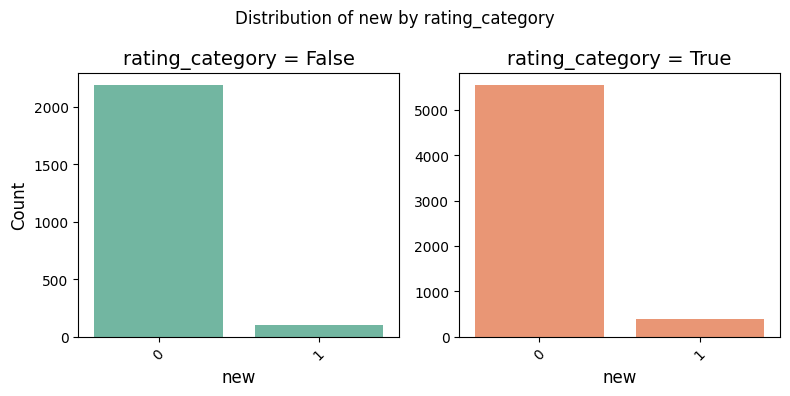

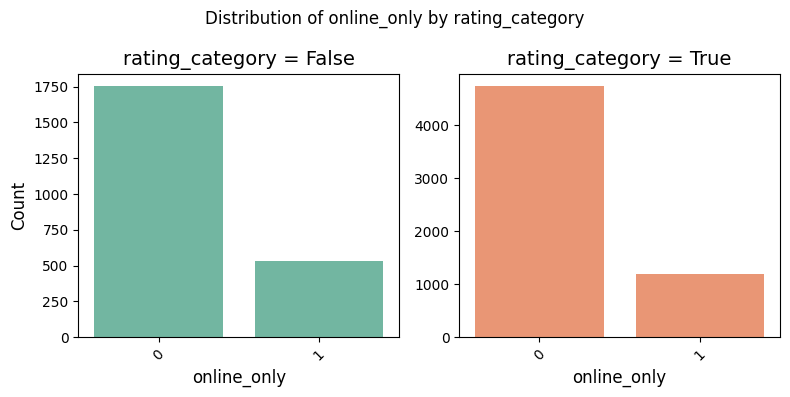

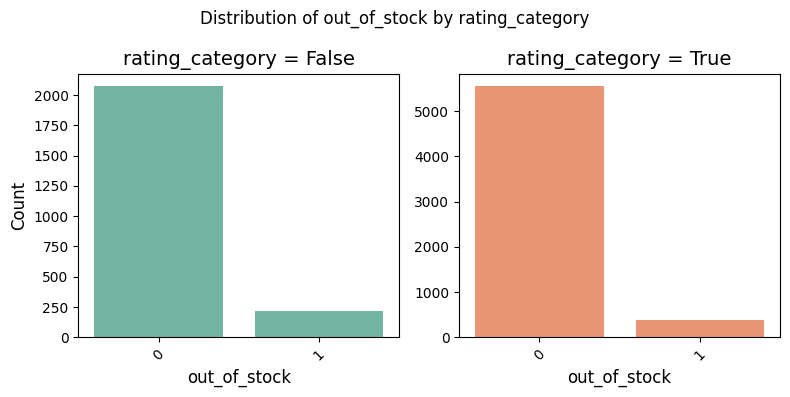

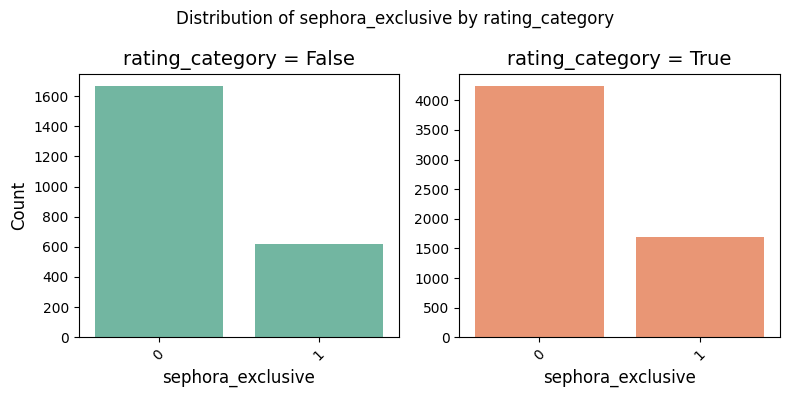

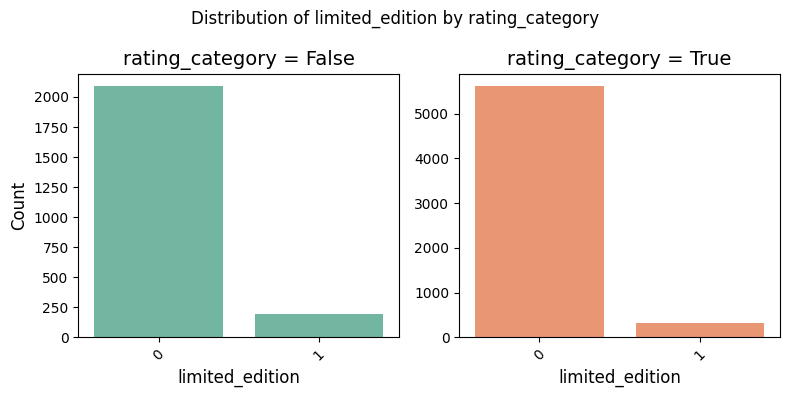

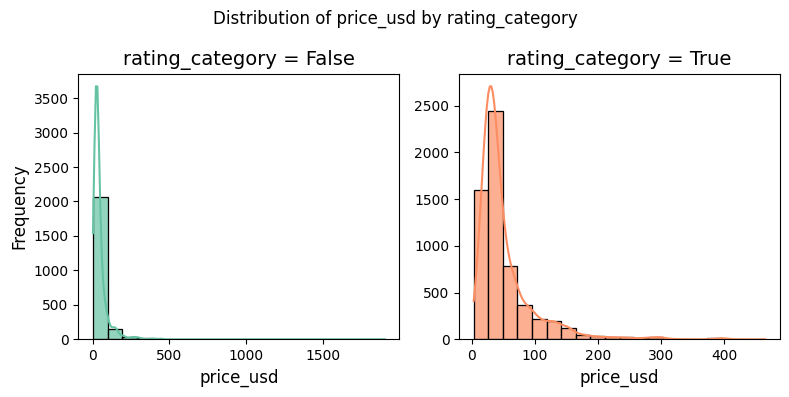

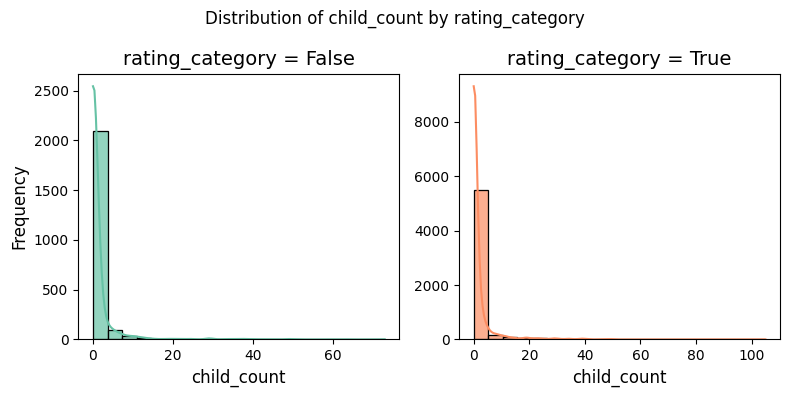

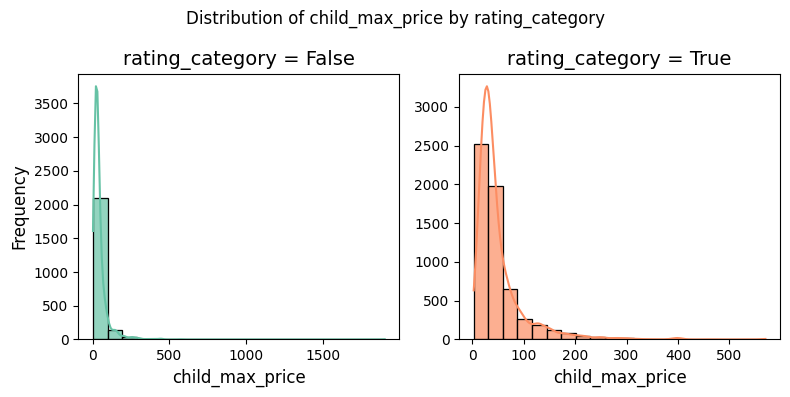

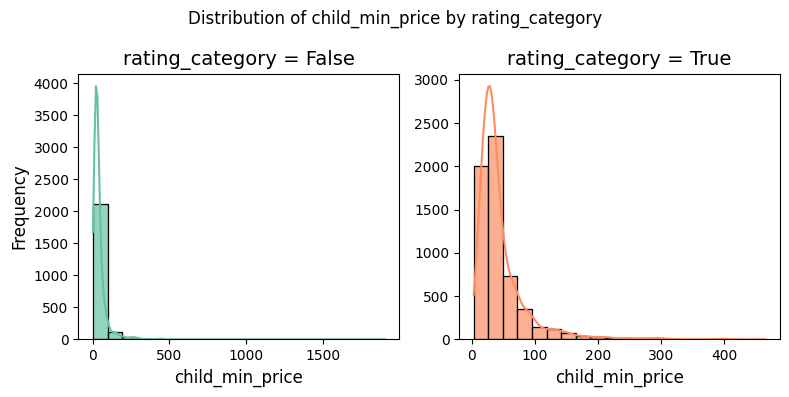

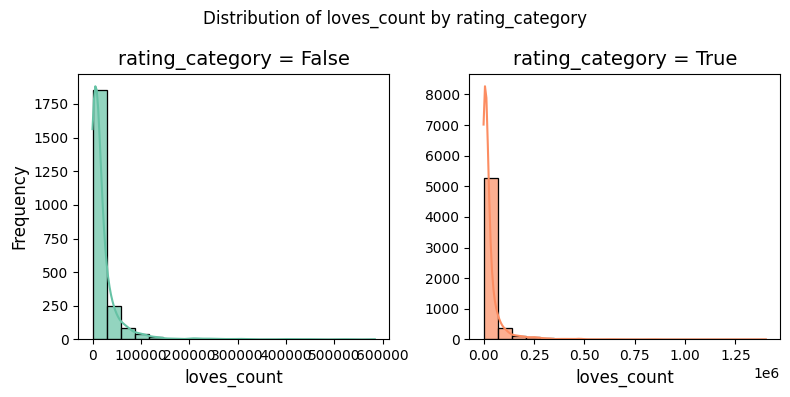

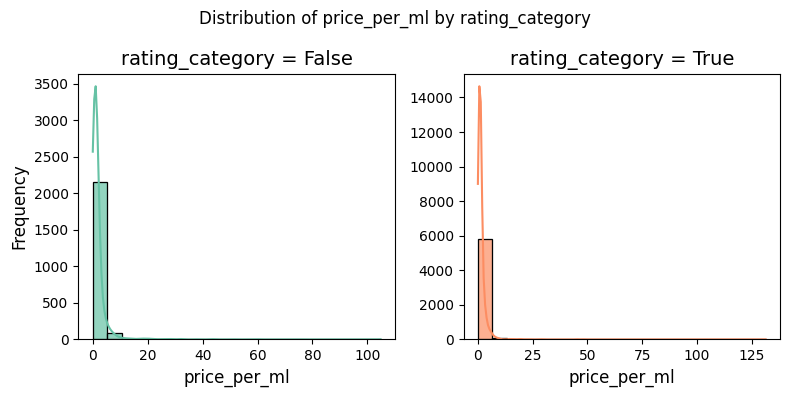

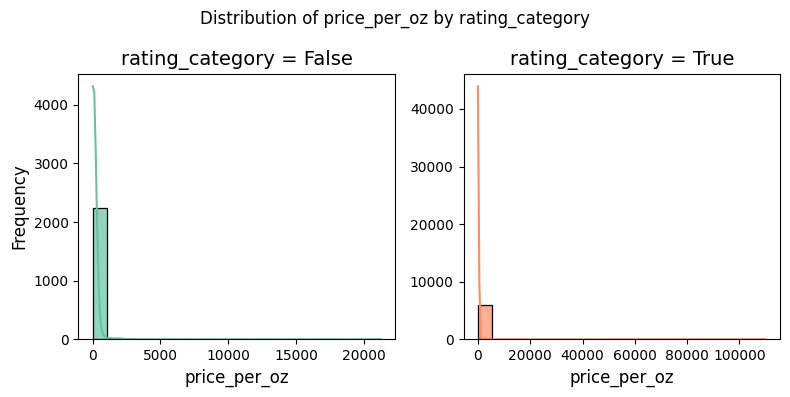

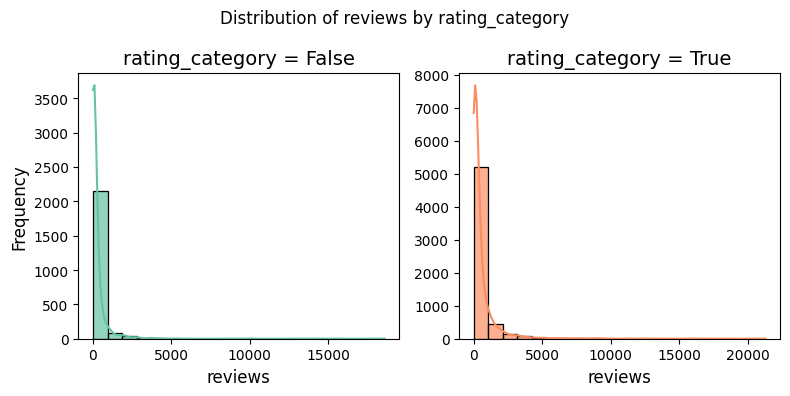

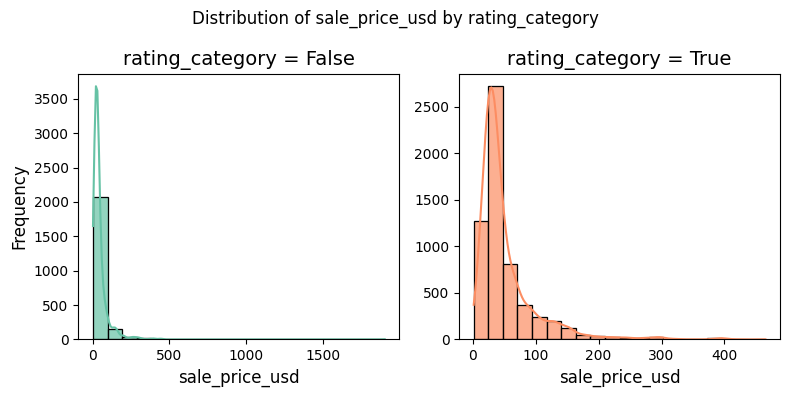

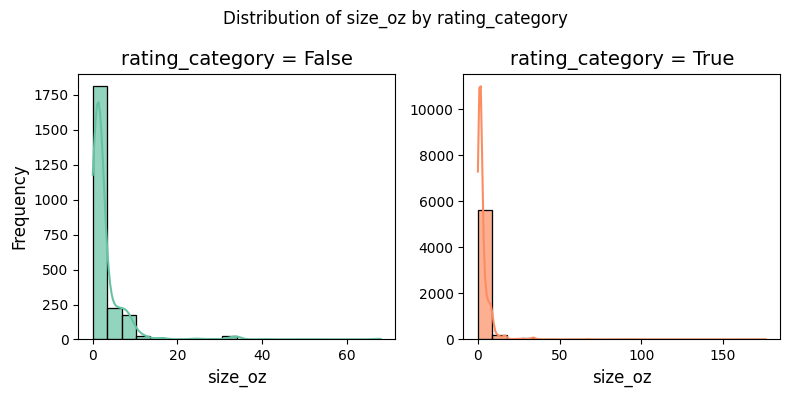

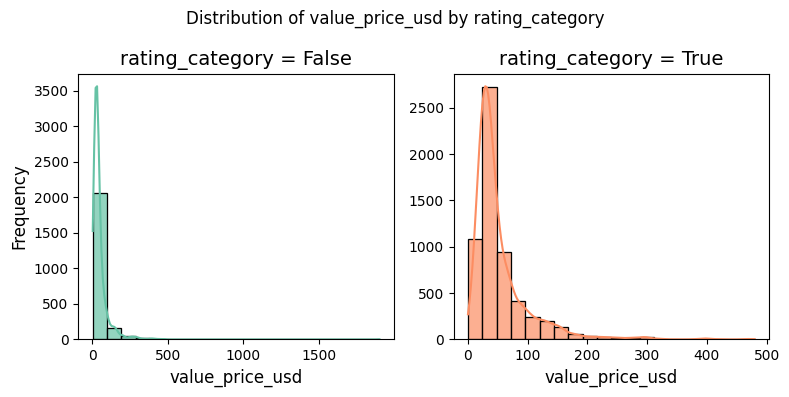

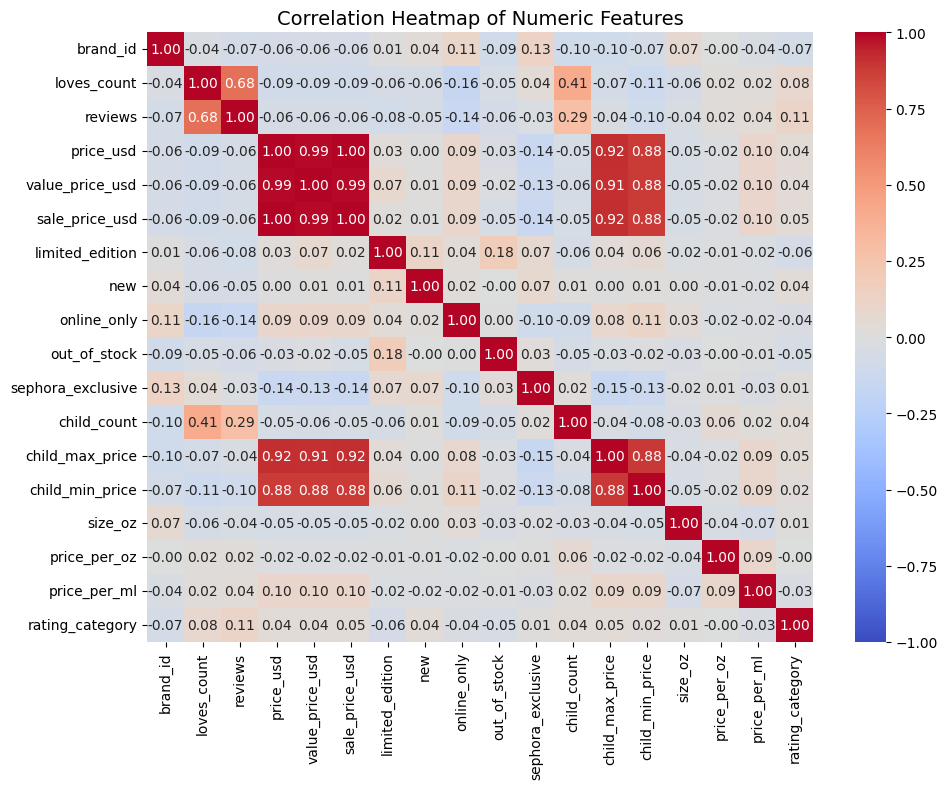

In [14]:
visualize_sephora_data_by_target(product_df, categorical_features, numerical_features, target="rating_category")

### Data Transformation

#### Numerical Features - Log Transformation

For numerical features, we applied log transformation to the several numerical features, and observed on the patterns with visualization tools. The results and visualizations are displayed as follows. By transforming the data in this way, data then becomes more standardized with being normalized towards a unified measurement scale.

In [15]:
# Apply Log Transformation to several numeric features and visualize the changes
# Use ChatGPT to facilitate data transformation

def apply_log_transformation(df, features):
    """
    Apply log transformation to specified numeric features in the DataFrame.
    
    Parameters:
    df (pd.DataFrame): Input DataFrame.
    features (list): List of column names to log transform.
    
    Returns:
    pd.DataFrame: DataFrame with log-transformed features.
    """
    df_transformed = df.copy()
    for feature in features:
        if feature in df_transformed.columns:
            # Apply log1p to handle zeros
            df_transformed[feature] = np.log1p(df_transformed[feature])
        else:
            print(f"Feature '{feature}' not found in DataFrame.")
    return df_transformed

def apply_sqrt_transformation(df, features):
    """
    Apply square root transformation to specified numeric features in the DataFrame.
    
    Parameters:
    df (pd.DataFrame): Input DataFrame.
    features (list): List of column names to apply square root transformation.
    
    Returns:
    pd.DataFrame: DataFrame with square root-transformed features.
    """
    df_transformed = df.copy()
    for feature in features:
        if feature in df_transformed.columns:
            # Apply sqrt transformation, ensure non-negative values
            df_transformed[feature] = np.sqrt(df_transformed[feature].clip(lower=0))
        else:
            print(f"Feature '{feature}' not found in DataFrame.")
    return df_transformed


def visualize_features(df, features, bins=20):
    """
    Visualize the distributions of specified features in the DataFrame.
    
    Parameters:
    df (pd.DataFrame): Input DataFrame.
    features (list): List of column names to visualize.
    bins (int): Number of bins for the histograms.
    
    Returns:
    None
    """
    print("Visualizing features...")
    print(features + ["rating_category"])
    visualize_sephora_data_by_target(df[features + ["rating_category"]], categorical_features=[], \
        numerical_features=features, target="rating_category")

Log Transformed Features:
Visualizing features...
['child_max_price', 'child_min_price', 'reviews', 'loves_count', 'price_usd', 'price_per_ml', 'price_per_oz', 'sale_price_usd', 'value_price_usd', 'rating_category']


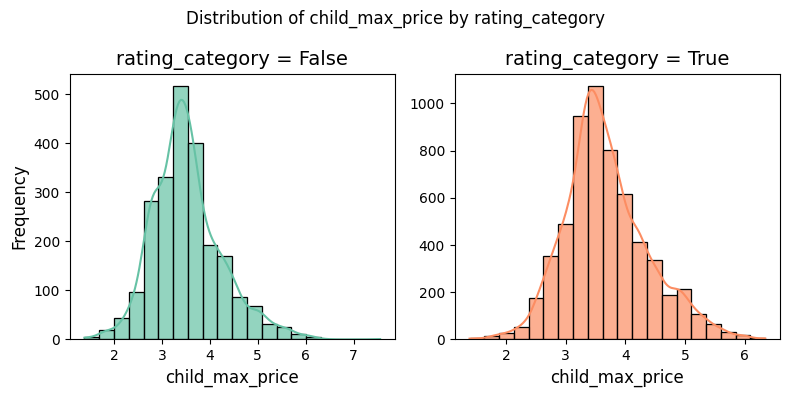

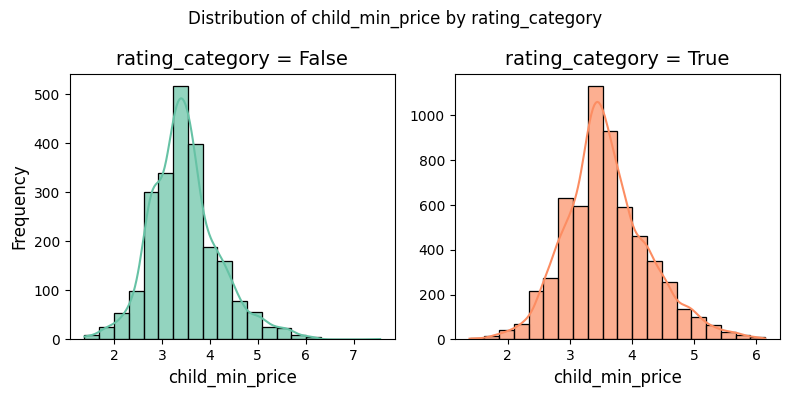

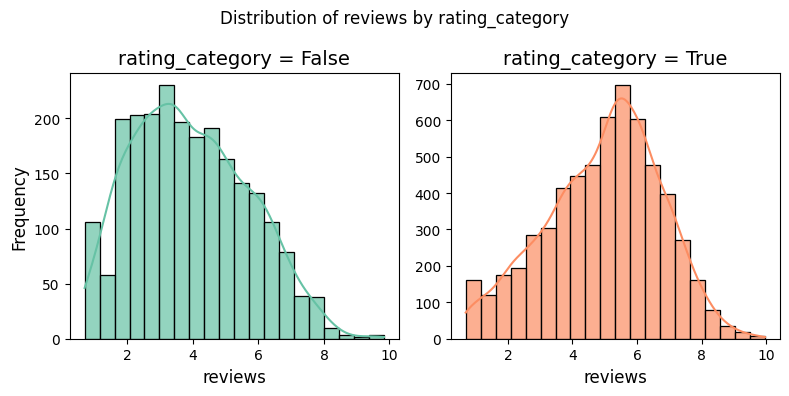

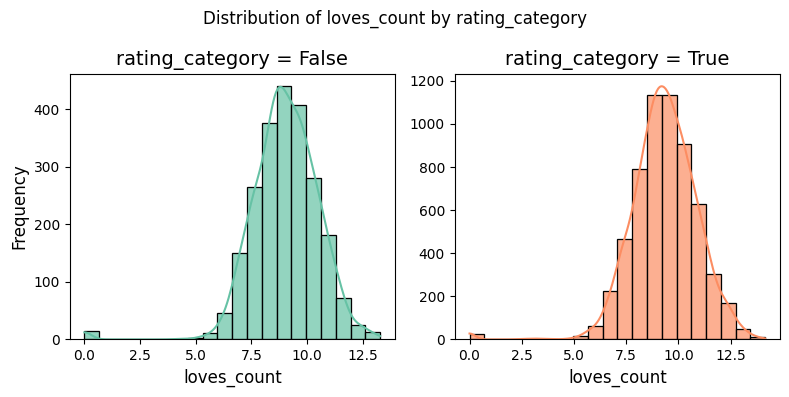

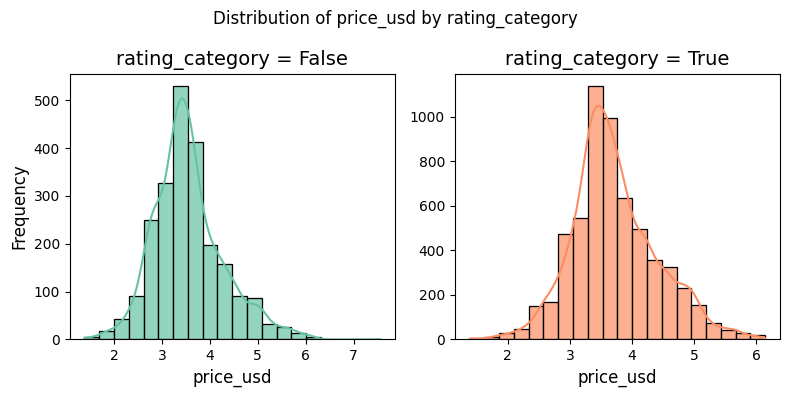

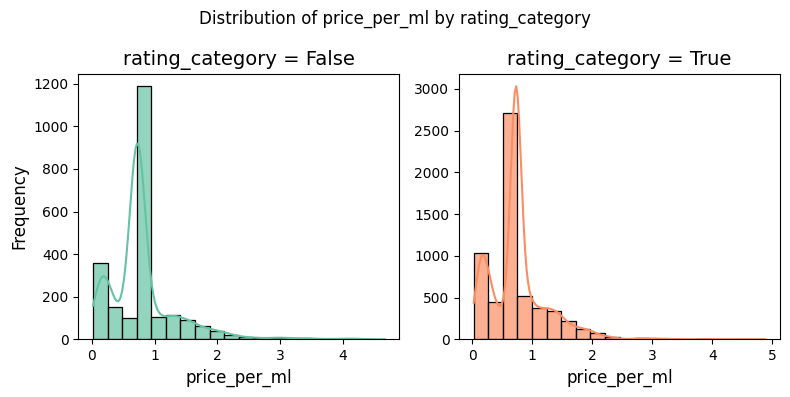

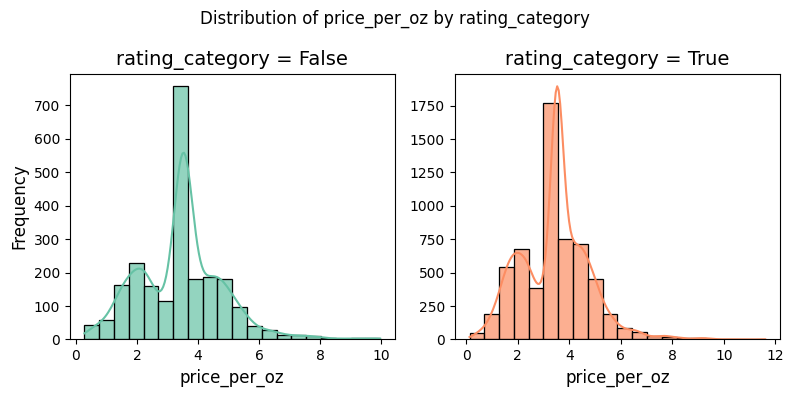

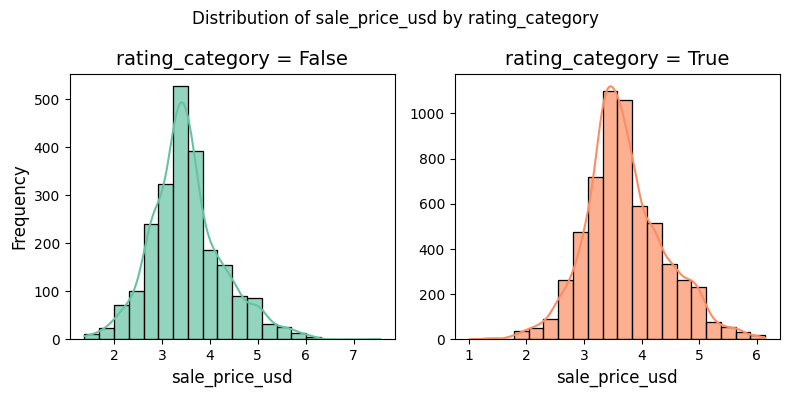

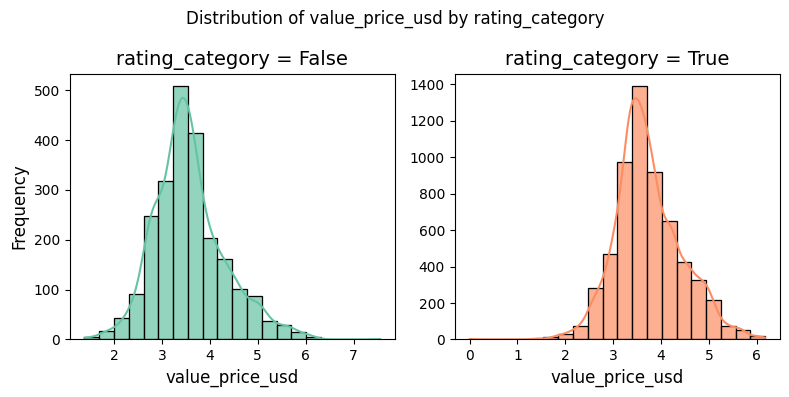

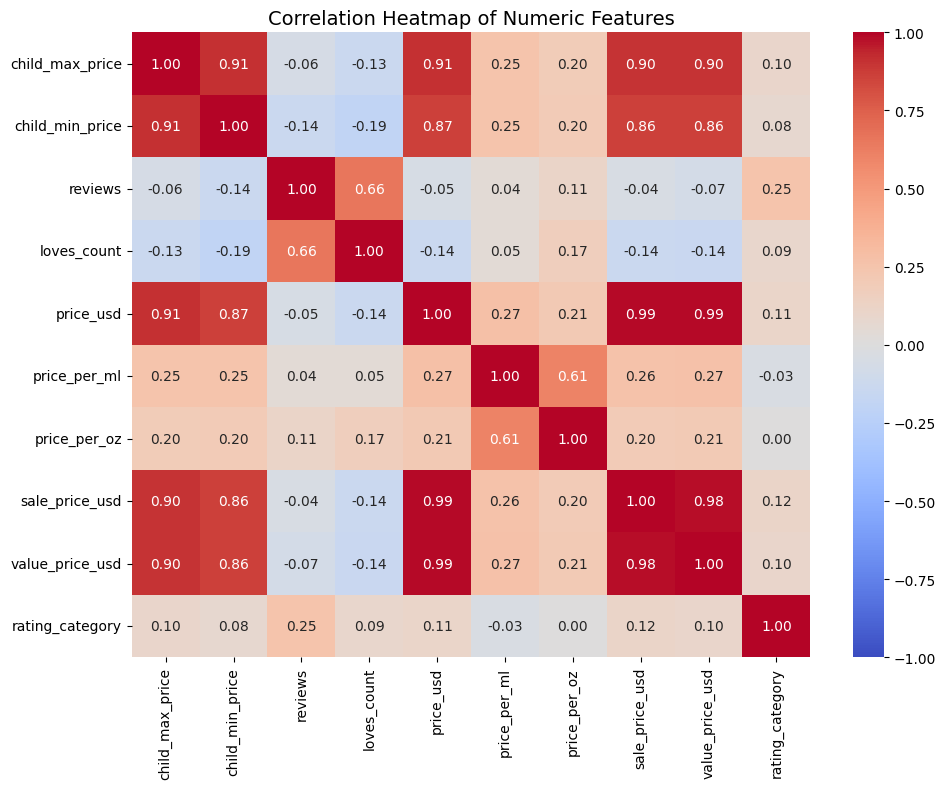

In [16]:
# Apply log transformation

features_to_transform = ['child_max_price', 'child_min_price', 
                    'reviews', 'loves_count', 'price_usd', 'price_per_ml',
                    'price_per_oz', 'sale_price_usd', 'value_price_usd']

product_df = apply_log_transformation(product_df, features_to_transform)

# Visualize transformed features
print("Log Transformed Features:")
visualize_features(product_df, features_to_transform)

#### Text Features - TF-IDF Encoding
For the text features in teh dataset, e.g., product name, ingredient info, etc., we choose to apply TF-IDF encoding techniques to transform text data into numerical representations accordingly. By encoding in this way, the features of important text information can then also be safely taken into consideration for future analysis.

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import pandas as pd

def tfidf_svd_transform(df, text_cols, n_components=50, max_features=500):
    """
    Apply TF-IDF vectorization and SVD, and append the reduced features to the original DataFrame.

    Parameters:
    df : pd.DataFrame
        Input DataFrame with text columns.
    text_cols : list
        List of column names to process.
    n_components : int
        Number of components for SVD dimensionality reduction.
    max_features : int
        Maximum number of features for TF-IDF vectorizer.

    Returns:
    pd.DataFrame
        DataFrame with the original data and added SVD components as new columns.
    """
    # Validate text columns
    missing_cols = [col for col in text_cols if col not in df.columns]
    if missing_cols:
        raise ValueError(f"The following columns are missing in the DataFrame: {missing_cols}")

    # Combine all specified text columns into a single column
    df['combined_text'] = df[text_cols].fillna('').astype(str).agg(' '.join, axis=1)
    
    # Check if combined_text is empty
    if df['combined_text'].str.strip().eq('').all():
        raise ValueError("All combined_text entries are empty. Check your input data.")

    # Apply TF-IDF vectorization
    vectorizer = TfidfVectorizer(max_features=max_features)
    tfidf_matrix = vectorizer.fit_transform(df['combined_text'])
    
    # Apply SVD for dimensionality reduction
    svd = TruncatedSVD(n_components=n_components, random_state=42)
    reduced_matrix = svd.fit_transform(tfidf_matrix)
    
    # Create new DataFrame for SVD features
    svd_cols = [f'svd_feature_{i+1}' for i in range(n_components)]
    svd_df = pd.DataFrame(reduced_matrix, columns=svd_cols, index=df.index)
    
    # Add SVD features to the original DataFrame
    df = pd.concat([df, svd_df], axis=1)
    
    # Drop the combined text column to clean up
    df.drop(columns=['combined_text'], inplace=True)
    
    return df

In [18]:
# Define the text columns and validate the DataFrame
text_cols = ['product_name', 'variation_desc', 'variation_type', 'variation_value',
             'highlights', 'secondary_category', 'tertiary_category', 'ingredients',
             'brand_name']

# Ensure product_df exists and test the function
try:
    product_df = tfidf_svd_transform(product_df, text_cols, n_components=50, max_features=500)
    print(product_df.shape)
    display(product_df.head())
except Exception as e:
    print(f"Error: {e}")

(8216, 79)


,product_id,product_name,brand_id,brand_name,loves_count,reviews,variation_type,variation_value,variation_desc,ingredients,...,svd_feature_41,svd_feature_42,svd_feature_43,svd_feature_44,svd_feature_45,svd_feature_46,svd_feature_47,svd_feature_48,svd_feature_49,svd_feature_50
0,P473671,Fragrance Discovery Set,6342,19-69,8.751633,2.484907,Unknown,Unknown,No variation,"['Capri Eau de Parfum:', 'Alcohol Denat. (SD A...",...,-0.078107,-0.111825,0.065459,-0.004931,-0.024866,0.010552,-0.055882,0.022548,-0.042553,0.082854
1,P473668,La Habana Eau de Parfum,6342,19-69,8.250098,2.639057,Size + Concentration + Formulation,3.4 oz/ 100 mL,No variation,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",...,-0.058013,0.004859,-0.035321,0.036063,0.024997,0.058837,-0.083002,-0.002889,0.011897,0.017640
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,8.087640,2.833213,Size + Concentration + Formulation,3.4 oz/ 100 mL,No variation,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",...,-0.081061,-0.038222,-0.057624,0.017186,0.079040,0.030036,-0.074196,0.035998,-0.002999,0.078784
3,P473660,Kasbah Eau de Parfum,6342,19-69,8.012681,3.091042,Size + Concentration + Formulation,3.4 oz/ 100 mL,No variation,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",...,-0.079502,-0.051366,-0.057475,0.014495,0.082156,0.042790,-0.076759,0.028056,0.001309,0.078641
4,P473658,Purple Haze Eau de Parfum,6342,19-69,7.898040,2.639057,Size + Concentration + Formulation,3.4 oz/ 100 mL,No variation,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",...,-0.074152,-0.069375,-0.039888,0.034529,0.091316,0.048502,-0.062758,0.001462,-0.000939,0.063429


## Classification and Analysis

### Train, Tune, and Ensemble Machine Learning Models

For this part, we build multiple machine learning models, optimize their performance through hyperparameter tuning, and explore ensembling techniques to improve overall prediction accuracy.

#### Data Preprocessing
From the above analysis, we decide categorical_features as `new`, `online_only`, `out_of_stock`, `sephora_exclusive`, and
`limited_edition`, with numerical features the remaining ones excluding `rating_category` as the target data, and `product_id` and `primary_category` being of no practical meaning intuitively.

In [19]:
# Step 1: Data Preprocessing
# Code generation by ChatGPT

from sklearn.model_selection import train_test_split

product_df = product_df.drop(columns=text_cols)

features = product_df.drop(columns=['rating_category', 'product_id', 'primary_category'])  # Feature data
target = product_df['rating_category']  # Target data

# Use train_test_split to split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    features,
    target, 
    test_size=0.2, 
    random_state=42,
    stratify=target
)

# Print the shapes of the split datasets
print("Shape of training feature set:", X_train.shape)
print("Shape of test feature set:", X_test.shape)
print("Shape of training target set:", y_train.shape)
print("Shape of test target set:", y_test.shape)

Shape of training feature set: (6572, 67)
Shape of test feature set: (1644, 67)
Shape of training target set: (6572,)
Shape of test target set: (1644,)


In [20]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

y_train = y_train.astype(int)  # Convert target to integer (binary classification)
y_test = y_test.astype(int)  # Convert target to integer (binary classification)

# Define numerical and categorical features
categorical_features = ['new', 'online_only', 'out_of_stock', 'sephora_exclusive',
                        'limited_edition']
num_features = [col for col in X_train.columns if col not in categorical_features]

# Ensure all specified features exist in X_train
missing_categorical = [col for col in categorical_features if col not in X_train.columns]
if missing_categorical:
    raise ValueError(f"Categorical features missing in X_train: {missing_categorical}")

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("scaler", StandardScaler(), num_features),  # Apply scaling to numerical features
        ("onehot", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)

# Apply the preprocessing pipeline to X_train and X_test
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Debug outputs to confirm transformation
print(f"Transformed X_train shape: {X_train_transformed.shape}")
print(f"Transformed X_test shape: {X_test_transformed.shape}")

Transformed X_train shape: (6572, 72)
Transformed X_test shape: (1644, 72)


In [21]:
# Define numerical and categorical features
categorical_features = ['new', 'online_only', 'out_of_stock', 'sephora_exclusive',
                        'limited_edition']
num_features = [col for col in X_train.columns if col not in categorical_features]

# Ensure all specified features exist in X_train
missing_categorical = [col for col in categorical_features if col not in X_train.columns]
if missing_categorical:
    raise ValueError(f"Categorical features missing in X_train: {missing_categorical}")

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("scaler", StandardScaler(), num_features),  # Apply scaling to numerical features
        ("onehot", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)

# Apply the preprocessing pipeline to X_train and X_test
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Debug outputs to confirm transformation
print(f"Transformed X_train shape: {X_train_transformed.shape}")
print(f"Transformed X_test shape: {X_test_transformed.shape}")

Transformed X_train shape: (6572, 72)
Transformed X_test shape: (1644, 72)


#### Definition of Model Pipelines

After data preprocessing at first sight, we define pipelines on 5 different machine learning models for comparison and potential further use, within which preprocessors are embedded within model pipelines for convenient use. The models under evaluation are:
- support vector machine
- random forest
- gradient boosting
- xgboost
- knn

  Also, we apply a `voting classifier` technique to build an ensemble model, combining on the seperate models (except knn) above as for further analysis.

In [22]:
# import relevant libraries
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate, KFold
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, roc_auc_score, log_loss
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [23]:
# Step 2: Model Pipelines
# Define individual models

# svm model
svm_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", SVC(
                        probability=True, 
                        kernel="rbf",  # Radial Basis Function kernel
                        C=5,         # Regularization parameter
                        gamma="auto", # Kernel coefficient
                        random_state=42
                    ))
])


In [24]:
# random forest
random_forest_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(
            n_estimators=200,       # Number of trees
            max_depth=None,           # Maximum tree depth
            min_samples_split=4,    # Minimum number of samples required to split
            min_samples_leaf=2,     # Minimum number of samples in a leaf node
            max_features="sqrt",    # Number of features to consider at each split
            bootstrap=True,         # Use bootstrap samples
            random_state=42
    ))
])


In [25]:
# gradient boosting
gradient_boosting_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", GradientBoostingClassifier(
            n_estimators=150,       # Number of boosting stages
            learning_rate=0.1,     # Learning rate shrinks contribution of each tree
            max_depth=3,            # Maximum depth of the individual regression estimators
            min_samples_split=5,    # Minimum number of samples required to split
            min_samples_leaf=2,     # Minimum number of samples in a leaf node
            subsample=0.8,          # Fraction of samples to be used for fitting the individual base learners
            random_state=42
    ))
])


In [26]:
# xgboost
xgboost_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", XGBClassifier(
        n_estimators=200,       # Number of boosting rounds
        learning_rate=0.1,      # Shrinkage rate
        max_depth=3,            # Maximum depth of a tree
        subsample=0.8,          # Subsample ratio of training instances
        gamma=0.2,                # Minimum loss reduction for a split
        random_state=42
    ))
])


In [27]:
# knn
knn_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", KNeighborsClassifier(
        n_neighbors=15,         # Number of neighbors
        weights="distance",     # Weight function (uniform or distance)
        algorithm="auto"       # Algorithm for nearest neighbors search
    ))
])

In [28]:
# Ensemble model (Voting Classifier)
ensemble_model = VotingClassifier(
    estimators=[
        ("svm", svm_model),
        ("rf", random_forest_model),
        ("gb", gradient_boosting_model),
        ("xgb", xgboost_model),
    ],
    voting="soft",  # Soft voting for probabilities,
    weights=[0.2, 0.2, 0.3, 0.3]  # Weights for voting
)

#### Optimization and Cross-validation on Seperate Models
In this part, we carried out optimization and cross-validation on the seperate included models as well as the initially ensembled voting classifier by applying GridSearchCV, with scoring-metric standards based on `accuracy`, `precision`, `recall`, `f1` and `roc_auc`. In this part, `K-fold` cross-validation method is used to generate an overall average performance evaluation on different models. The results of each model are displayed as follows.

In [29]:
# Code generation by ChatGPT


# Define hyperparameter grids for each model
param_grids = {
    "Support Vector Machine": {
        "classifier__C": [0.5, 1, 4, 5, 6, 8, 10],  # Regularization parameter
        "classifier__gamma": ["scale", "auto"],  # Kernel coefficient
        "classifier__kernel": ["rbf", "linear"]  # Kernel type
    },
    "Random Forest": {
        "classifier__n_estimators": [50, 100, 150, 200],
        "classifier__max_depth": [10, 15, 20, None],
        "classifier__min_samples_split": [2, 5, 10],
        "classifier__min_samples_leaf": [1, 2, 4]
    },
    "Gradient Boosting": {
        "classifier__n_estimators": [100, 150, 200],
        "classifier__learning_rate": [0.01, 0.05, 0.1, 0.3],
        "classifier__max_depth": [3, 5, 8, 10]
    },
    "XGBoost": {
        "classifier__n_estimators": [100, 150, 200],
        "classifier__learning_rate": [0.01, 0.1, 0.2],
        "classifier__max_depth": [3, 5, 8, 10], 
        "classifier__gamma": [0, 0.1, 0.2, 0.5]
    },
    "Ensemble": {
        "weights": [[0.2, 0.2, 0.3, 0.3], [0.25, 0.25, 0.25, 0.25], \
            [0.2, 0.3, 0.2, 0.3]]# Weights for voting
        },
}

In [30]:
# Function to perform hyperparameter tuning
# Define a generic function for a single model
def optimize_model(model_name, model, param_grid, X, y):
    print(f"\nOptimizing {model_name}...")
    search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        scoring="roc_auc",
        cv=5,
        verbose=1,
        n_jobs=-1
    )
    search.fit(X, y)
    print(f"Best parameters for {model_name}: {search.best_params_}")
    print(f"Best ROC-AUC for {model_name}: {search.best_score_:.4f}")
    return search.best_estimator_

In [31]:
# Step 3: Cross-validation with multiple metrics in one pass
# code refined by copilot for seperate evaluation of each model

kf = KFold(n_splits=5, shuffle=True, random_state=42)

models = {
    "Support Vector Machine": svm_model,
    "Random Forest": random_forest_model,
    "Gradient Boosting": gradient_boosting_model,
    "XGBoost": xgboost_model,
    "Ensemble": ensemble_model
}

# Define multiple scoring metrics
scoring_metrics = {
    "accuracy": "accuracy",
    "precision": make_scorer(precision_score, average="binary"),
    "recall": make_scorer(recall_score, average="binary"),
    "f1": make_scorer(f1_score, average="binary"),
    "roc_auc": "roc_auc",
}


In [32]:
# Perform hyperparameter tuning
svm_optimized = optimize_model(
    "Support Vector Machine", 
    models["Support Vector Machine"], 
    param_grids["Support Vector Machine"], 
    X_train,  # Use the original X_train
    y_train
)


Optimizing Support Vector Machine...
Fitting 5 folds for each of 28 candidates, totalling 140 fits
Best parameters for Support Vector Machine: {'classifier__C': 1, 'classifier__gamma': 'auto', 'classifier__kernel': 'rbf'}
Best ROC-AUC for Support Vector Machine: 0.7392


In [33]:
rf_optimized = optimize_model(
    "Random Forest", 
    models["Random Forest"], 
    param_grids["Random Forest"], 
    X_train, 
    y_train
)


Optimizing Random Forest...
Fitting 5 folds for each of 144 candidates, totalling 720 fits


c:\Users\21000\UMSI\618\Sephora-Data-Analysis-SI618\.venv\lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters for Random Forest: {'classifier__max_depth': 20, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 200}
Best ROC-AUC for Random Forest: 0.7478


In [34]:
gb_optimized = optimize_model(
    "Gradient Boosting", 
    models["Gradient Boosting"], 
    param_grids["Gradient Boosting"], 
    X_train, 
    y_train
)


Optimizing Gradient Boosting...
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameters for Gradient Boosting: {'classifier__learning_rate': 0.05, 'classifier__max_depth': 10, 'classifier__n_estimators': 200}
Best ROC-AUC for Gradient Boosting: 0.7629


In [35]:
xgb_optimized = optimize_model(
    "XGBoost", 
    models["XGBoost"], 
    param_grids["XGBoost"], 
    X_train, 
    y_train
)


Optimizing XGBoost...
Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best parameters for XGBoost: {'classifier__gamma': 0.2, 'classifier__learning_rate': 0.1, 'classifier__max_depth': 8, 'classifier__n_estimators': 200}
Best ROC-AUC for XGBoost: 0.7641


In [36]:
ensemble_optimized = optimize_model(
    "Ensemble", 
    models["Ensemble"], 
    param_grids["Ensemble"], 
    X_train, 
    y_train
)


Optimizing Ensemble...
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best parameters for Ensemble: {'weights': [0.2, 0.3, 0.2, 0.3]}
Best ROC-AUC for Ensemble: 0.7684


From the optimized results above, we can find that the ensembled model with the parameters displayed above have the best performance upon cross-validation. The standard applied for comparison is `ROC-AUC` for consideration of comprehensiveness.

### Model Evaluation on Test Set
For the next step, the optimized ensemble model is trained on the entire training set and evaluated on the independent test set. The evaluation results are displayed as follows.

In [37]:
# Step 4: Fit the ensemble_optimized model and predict
ensemble_optimized.fit(X_train, y_train)
predictions = ensemble_optimized.predict(X_test)
predicted_probabilities = ensemble_optimized.predict_proba(X_test)  # For metrics requiring probabilities

# Step 5: Evaluate the ensemble_optimized model
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
roc_auc = roc_auc_score(y_test, predicted_probabilities[:, 1])  # Use the positive class probabilities
logloss = log_loss(y_test, predicted_probabilities)

# Display the evaluation results
print("Optimized Ensemble Model Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print(f"Log Loss: {logloss:.4f}")


Optimized Ensemble Model Evaluation:
Accuracy: 0.7439
Precision: 0.7600
Recall: 0.9427
F1 Score: 0.8416
ROC-AUC: 0.7654
Log Loss: 0.5045


*interpretation generated by chatgpt*

The evaluation metrics for the optimized ensemble model demonstrate a solid overall performance, particularly in its ability to identify positive cases effectively. The high recall value of 0.9427 indicates that the model successfully detects most true positives, which is essential in scenarios where false negatives could lead to adverse outcomes. For instance, in domains like healthcare or fraud detection, high recall ensures critical instances are not overlooked.

The precision, at 0.7600, suggests the model has a moderate rate of false positives. While this is acceptable, it does mean that some non-positive instances are misclassified as positive, which could lead to inefficiencies in specific contexts, such as requiring additional validation steps. The balance between precision and recall is reflected in the F1 score of 0.8416, which provides a more nuanced view of the model’s ability to manage both false positives and false negatives. This makes the model suitable for tasks with class imbalance where both metrics are crucial.

A ROC-AUC of 0.7654 reflects the model’s ability to distinguish between classes. While this score is above average, it indicates room for improvement, particularly in increasing the separation between positive and negative predictions. This could be achieved by refining the ensemble components or incorporating additional features to improve discrimination.

Finally, the log loss of 0.5045 measures the uncertainty in the predicted probabilities. A lower log loss value would indicate better-calibrated probability estimates, so while the current result is reasonable, further calibration or adjustments in hyperparameters could reduce uncertainty and improve predictive reliability. Collectively, the results suggest a well-performing model that could benefit from fine-tuning to enhance precision and reduce uncertainty in certain applications.

# Model Analysis and Interpretation

To further interpret on the model, we apply the SHAP model to evaluate and visualize on the feature importance of the input variables for the optimized ensemble model. The process is displayed as follows.

c:\Users\21000\UMSI\618\Sephora-Data-Analysis-SI618\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


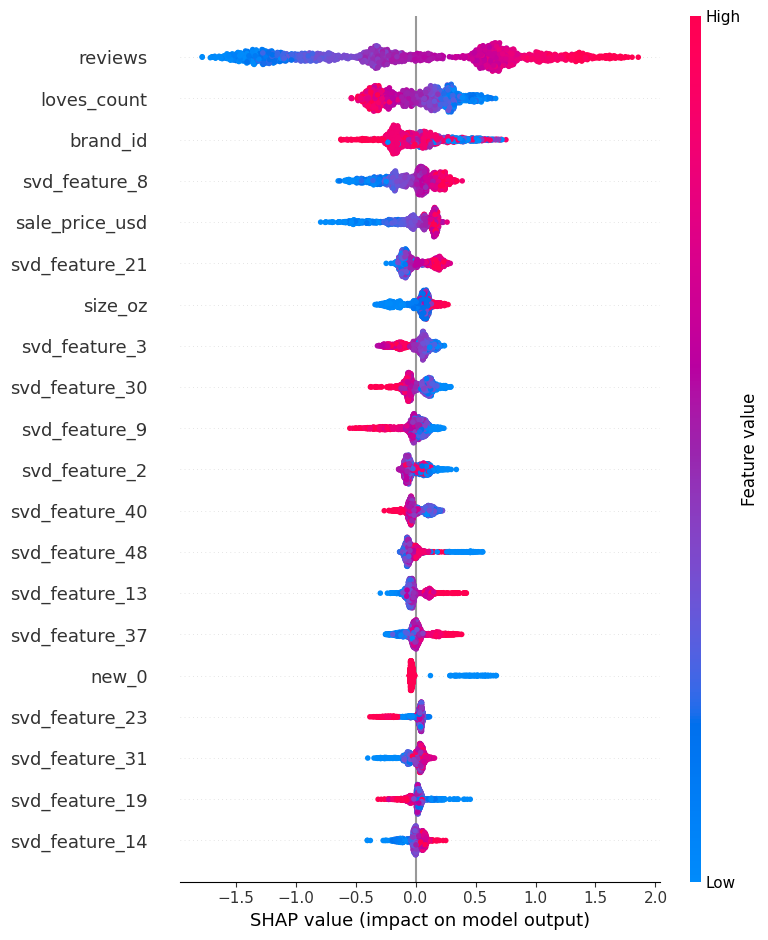

In [38]:
# prompt to copilot: perform shap analysis on the optimized ensemble model in the previous block
import shap

# Extract feature names from the preprocessor
num_features = preprocessor.transformers_[0][2]
cat_features = preprocessor.transformers_[1][1].get_feature_names_out(categorical_features)
feature_names = list(num_features) + list(cat_features)

# Create a SHAP explainer
explainer = shap.Explainer(ensemble_optimized.named_estimators_['xgb'].named_steps['classifier'], X_train_transformed)

# Calculate SHAP values
shap_values = explainer(X_test_transformed)

# Plot the SHAP summary plot
shap.summary_plot(shap_values, X_test_transformed, feature_names=feature_names)


From the figure we can see that `reviews` stand for very high portion among all the features included, followed by `loves_count`, `brand`, etc. The result is rather intuitive, firstly, the contents of reviews directly reflect the user's attitude towards the product. Secondly, `loves_count` stands for the extent to which people love this product. At the same time, `brand` is a unique identifier for the product itself. By explaining the model with such SHAP analysis, we can safely conclude that the model itself is not only highly-accurate with prediction, but also logically self-consistent.